In [21]:
# notebook imports

import numpy as np
import os
import random

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D

In [2]:
noisy_imgs_path ='Noisy_Documents/noisy/'
clean_imgs_path = 'Noisy_Documents/clean/'

In [9]:
X_train_noisy = []

for file in sorted(os.listdir(noisy_imgs_path)):
    img = load_img(noisy_imgs_path+file, color_mode='grayscale', target_size=(420,540))
    img = img_to_array(img).astype('float32')/255
    X_train_noisy.append(img)
    
# convert to numpy array

X_train_noisy = np.array(X_train_noisy)

In [10]:
# to verify that our image has loaded properly

print(X_train_noisy.shape)

(216, 420, 540, 1)


In [11]:
# let's do the same for clean image

X_train_clean = []

for file in sorted(os.listdir(clean_imgs_path)):
    img = load_img(clean_imgs_path+file, color_mode='grayscale', target_size=(420,540))
    img = img_to_array(img).astype('float32')/255
    X_train_clean.append(img)

X_train_clean = np.array(X_train_clean)

In [12]:
print(X_train_clean.shape)

(216, 420, 540, 1)


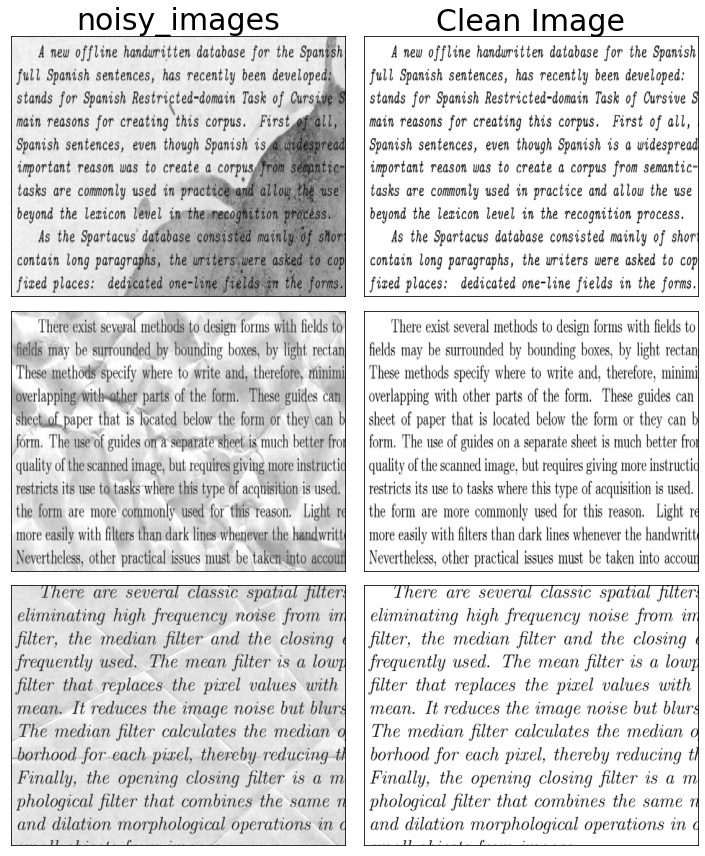

In [17]:
# select random 3 images and plot them

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(10,12))

randomly_selected_imgs = random.sample(range(X_train_noisy.shape[0]),3)

# plot noisy image on the left
for i, ax in enumerate([ax1,ax3,ax5]):
    ax.imshow(X_train_noisy[randomly_selected_imgs[i]].reshape(420,540), cmap='gray')
    if i ==0:
        ax.set_title('noisy_images', size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# plot clean image on the right
for i, ax in enumerate([ax2,ax4,ax6]):
    ax.imshow(X_train_clean[randomly_selected_imgs[i]].reshape(420,540), cmap='gray')
    if i ==0:
        ax.set_title("Clean Image", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()
    

In [18]:
# split the dataset into training and test datasets


In [19]:
# use the first 20 noisy images as testing images

X_test_noisy = X_train_noisy[:20]
X_train_noisy = X_train_noisy[21:]

In [20]:
# use the first 20 clean images as test images

X_test_clean = X_train_clean[:20]
X_train_clean = X_train_clean[21:]

## Basic Convolutional Autoencoder

In [24]:
basic_conv_autoencoder = Sequential()

# add single convolutional layer as encoder layer

basic_conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same', input_shape=(420,540,1)))


# add single convolution layer as decoder layer

basic_conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))

# add output layer

basic_conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

In [25]:
basic_conv_autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 420, 540, 8)       80        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 420, 540, 8)       584       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 420, 540, 1)       73        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [26]:
# train basic convolutional autoencoder 

basic_conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
basic_conv_autoencoder.fit(X_train_noisy, X_train_clean, epochs=10)

Epoch 1/10
7/7 [==============================] - 27s 4s/step - loss: 0.6685
Epoch 2/10
7/7 [==============================] - 24s 3s/step - loss: 0.6408
Epoch 3/10
7/7 [==============================] - 26s 4s/step - loss: 0.6065
Epoch 4/10
7/7 [==============================] - 26s 4s/step - loss: 0.5549
Epoch 5/10
7/7 [==============================] - 33s 5s/step - loss: 0.4845
Epoch 6/10
7/7 [==============================] - 26s 4s/step - loss: 0.3988
Epoch 7/10
7/7 [==============================] - 25s 4s/step - loss: 0.3121
Epoch 8/10
7/7 [==============================] - 24s 3s/step - loss: 0.2520
Epoch 9/10
7/7 [==============================] - 26s 4s/step - loss: 0.2283
Epoch 10/10
7/7 [==============================] - 25s 4s/step - loss: 0.2162


In [27]:
# let's apply our model on testing

output = basic_conv_autoencoder.predict(X_test_noisy)

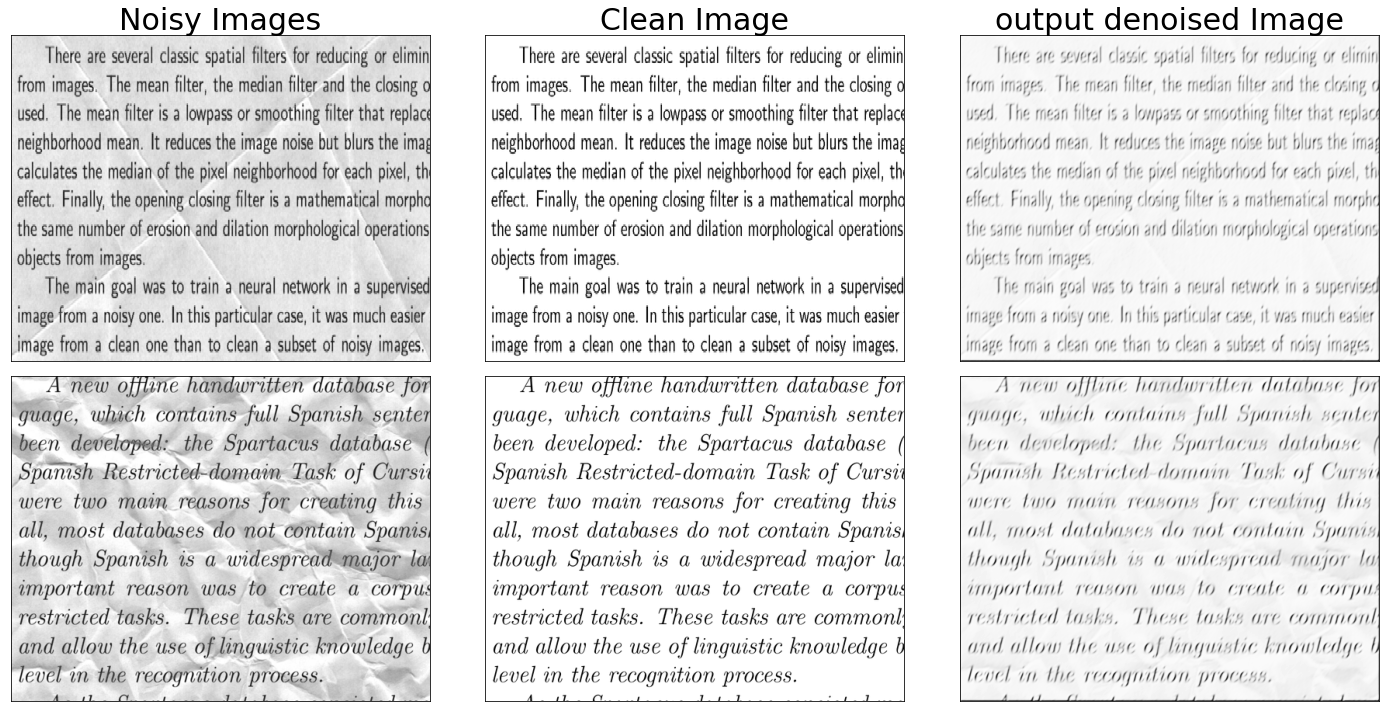

In [30]:
# comparing original and obtained output 

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))

randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]),2)

for i,ax in enumerate([ax1,ax4]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_noisy[idx].reshape(420,540), cmap='gray')
    if i ==0 :
        ax.set_title("Noisy Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# plotting clean image on the second column

for i ,ax in enumerate([ax2,ax5]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_clean[idx].reshape(420,540), cmap='gray')
    if i ==0:
        ax.set_title("Clean Image", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
# plotting output image on the last column

for i ,ax in enumerate([ax3,ax6]):
    idx = randomly_selected_imgs[i]
    ax.imshow(output[idx].reshape(420,540), cmap='gray')
    if i ==0:
        ax.set_title("output denoised Image", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


In [33]:
# output denoised image have gray backgroud ranther than white in case of the clean image
# does poorly at removing stain
# also have fait text which show that model is struggling
# we can do better than this. LET us try Deep convolutional autoencoder

## Deep Convolutional Autoencoder

In [36]:
conv_autoencoder = Sequential()

# add 3 convolutional layer as encoder

conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(420, 540,1), 
                           activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), 
                           activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=4, kernel_size=(3,3), 
                           activation='relu', padding='same'))
                     
# add 3 convolutional layer as decoder
conv_autoencoder.add(Conv2D(filters=4, kernel_size=(3,3), 
                           activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), 
                           activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3),
                           activation='relu', padding='same'))

# add an output layer

conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid',padding='same'))

In [38]:
conv_autoencoder.summary()

# i have reduced the number of parameters to reduce the training time

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 420, 540, 16)      160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 420, 540, 8)       1160      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 420, 540, 4)       292       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 420, 540, 4)       148       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 420, 540, 8)       296       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 420, 540, 16)      1168      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 420, 540, 1)      

In [39]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(X_train_noisy, X_train_clean, epochs=10)

Epoch 1/10
7/7 [==============================] - 72s 10s/step - loss: 0.6973
Epoch 2/10
7/7 [==============================] - 71s 10s/step - loss: 0.6800
Epoch 3/10
7/7 [==============================] - 67s 10s/step - loss: 0.6455
Epoch 4/10
7/7 [==============================] - 1148s 164s/step - loss: 0.5490
Epoch 5/10
7/7 [==============================] - 69s 10s/step - loss: 0.3795
Epoch 6/10
7/7 [==============================] - 3532s 505s/step - loss: 0.3204
Epoch 7/10
7/7 [==============================] - 79s 11s/step - loss: 0.3232
Epoch 8/10
7/7 [==============================] - 69s 10s/step - loss: 0.3045
Epoch 9/10
7/7 [==============================] - 67s 10s/step - loss: 0.3039
Epoch 10/10
7/7 [==============================] - 69s 10s/step - loss: 0.2970


In [40]:
output = conv_autoencoder.predict(X_test_noisy)

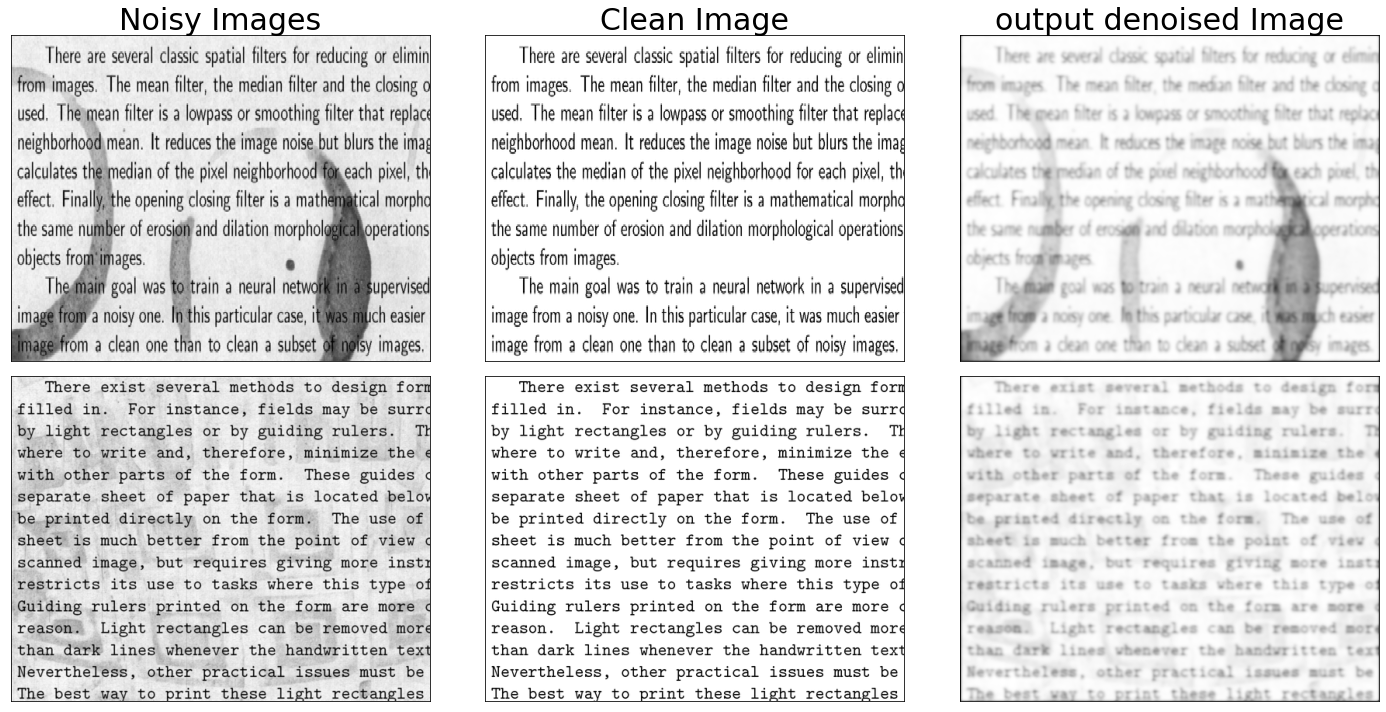

In [41]:
# comparing original and obtained output 

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))

randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]),2)

for i,ax in enumerate([ax1,ax4]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_noisy[idx].reshape(420,540), cmap='gray')
    if i ==0 :
        ax.set_title("Noisy Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# plotting clean image on the second column

for i ,ax in enumerate([ax2,ax5]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_clean[idx].reshape(420,540), cmap='gray')
    if i ==0:
        ax.set_title("Clean Image", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
# plotting output image on the last column

for i ,ax in enumerate([ax3,ax6]):
    idx = randomly_selected_imgs[i]
    ax.imshow(output[idx].reshape(420,540), cmap='gray')
    if i ==0:
        ax.set_title("output denoised Image", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()